Абонент хочет оптимизировать свои затраты на связь, сменив текущий тарифный план. Три оператора сотовой связи прислали свои предложения: описание всех тарифных планов агрегированы в единый документ. Имеется также выгрузка исходящих вызовов абонента за последние 6 месяцев.
Необходимо исследовать характер исходящих звонков абонента и предложить оптимальный тариф, обосновав свои рекомендации аналитическими расчетами. 
Примечание: начать исследование рекомендуется с описания начального набора данных.


ТАРИФЫ:
* Монстр общения - tarif_1
* Хочу сказать - tarif_2
* Больше слов - tarif_3
* 33 копейки - tarif_4
* Много звонков- tarif_5

## Загрузка нужных библиотек

In [1]:
# !pip install pandas
# !pip install math 
# !pip install datetime 
# !pip install numpy
# !pip install re

In [2]:
import pandas as pd
import math 
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import re

## Загрузка данных

In [3]:
tarifs = ['Монстр общения',
'Хочу сказать ',
'Больше слов ',
'33 копейки ',
'Много звонков']

In [4]:
tarif_dct = {}

In [5]:
for i in range(len(tarifs)):
    tarif_dct[f'tarif_{(i+1)}'] = tarifs[i]

In [6]:
tarif_dct

{'tarif_1': 'Монстр общения',
 'tarif_2': 'Хочу сказать ',
 'tarif_3': 'Больше слов ',
 'tarif_4': '33 копейки ',
 'tarif_5': 'Много звонков'}

In [7]:
data = pd.read_excel('Исходящие вызовы абонента.xlsx',index_col=0)

In [8]:
data.columns=['call_duration','operator']
data.index.rename('date',inplace=True)

In [9]:
data['call_duration'][0]

'00:01:49'

In [10]:
def duration_simplify(row):
    return (datetime.datetime.strptime(row, '%H:%M:%S').time().minute + 1)

In [11]:
data['call_duration'] = data['call_duration'].apply(duration_simplify)

In [12]:
data.head(2)

,call_duration,operator
date,,
15.12.2010 10:50:54,2,билайн
15.12.2010 11:50:42,1,билайн


In [13]:
data.index = pd.to_datetime(data.index)
data['month'] = data.index.month

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1230 entries, 2010-12-15 10:50:54 to 2010-09-27 14:13:48
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   call_duration  1230 non-null   int64 
 1   operator       1230 non-null   object
 2   month          1230 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 38.4+ KB


In [15]:
data.index.max() - data.index.min()

Timedelta('347 days 05:28:51')

In [16]:
data['operator'].nunique()


8

In [17]:
data['operator'].unique()

array(['билайн', 'городской', 'мегафон', 'мтс', 'смартс', 'теле 2',
       'уралсвязьинфом', 'яртелеком'], dtype=object)

Есть данные о звонках за 347 дней. Человек звонил 8 разным операторам:

* 'билайн'
* 'городской'
* 'мегафон' 
* 'мтс'
* 'смартс' 
* 'теле 2'
* 'уралсвязьинфом'
* 'яртелеком'

In [18]:
first_condition_tarif_1  = data['call_duration']==1
second_condition_tarif_1 = ((data['call_duration'] > 1) & 
                                         (data['call_duration'] < 10))

In [19]:
data['cost_tarif_1'] = np.where(first_condition_tarif_1,1.5,
                                np.where(second_condition_tarif_1,0.5,1))

In [20]:
data['cost_tarif_2'] = np.where(data['call_duration']<=5,3.95,0.4)

In [21]:
cumulative_duration =0
for i, call_duration in enumerate(data['call_duration']):
    cumulative_duration+=call_duration
    if cumulative_duration > 555:
        start_index = i
        break

In [22]:
data.loc[:start_index, 'cost_tarif_3'] = 0
data['cost_tarif_3'].fillna(value=1.95,inplace=True)

C:\Users\Egor\anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [23]:
data.head(2)

,call_duration,operator,month,cost_tarif_1,cost_tarif_2,cost_tarif_3
date,,,,,,
2010-12-15 10:50:54,2,билайн,12,0.5,3.95,0.0
2010-12-15 11:50:42,1,билайн,12,1.5,3.95,0.0


In [24]:
data['cost_tarif_4'] = np.where(data['call_duration']==1,1,0.33)

In [25]:
data['operator'].unique()

array(['билайн', 'городской', 'мегафон', 'мтс', 'смартс', 'теле 2',
       'уралсвязьинфом', 'яртелеком'], dtype=object)

In [26]:
first_condition_tarif_5 = ((data['call_duration'] < 6)
                            &  (data['call_duration'] > 30)
                           & (data['operator'] != "мтс"))


In [27]:
second_condition_tarif_5 = ((data['call_duration'] > 5)
                            &  (data['call_duration'] < 31)
                           & (data['operator'] != "мтс"))

In [28]:
data['cost_tarif_5'] = np.where(first_condition_tarif_5,0.9,np.where(second_condition_tarif_5,0.05,0))

In [29]:
first_condition_tarif_5_mts = ((data['call_duration'] < 6)
                            &  (data['call_duration'] > 30))


In [30]:
data['cost_tarif_6'] = np.where(first_condition_tarif_5_mts,0.9,0.05)

## Количество совершенных исходящих вызовов по месяцам и операторам


In [31]:
# рассчитываем общую продолжительность звонков за каждый месяц для каждого оператора
calls_by_month_operator = data.groupby(['operator', 'month'])['call_duration'].sum()


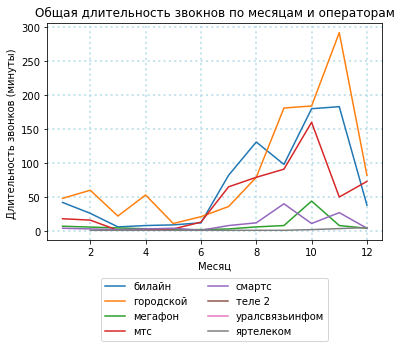

In [32]:
# список операторов
operators = data['operator'].unique()
# цикл по операторам
for operator in operators:
    # выбираем данные для текущего оператора
    operator_data = calls_by_month_operator.loc[operator]
    
    # создаем график
    plt.plot(operator_data.index, operator_data.values, label=operator)
    
# добавляем легенду и метки осей
plt.legend()
plt.xlabel('Месяц')
plt.title('Общая длительность звокнов по месяцам и операторам')
plt.ylabel('Длительность звонков (минуты) ')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(color='LightBlue', alpha=0.7, linestyle=':', linewidth=2)
# выводим график
plt.show()


## Операторы связи, на которые совершаются большинство исходящих вызовов.

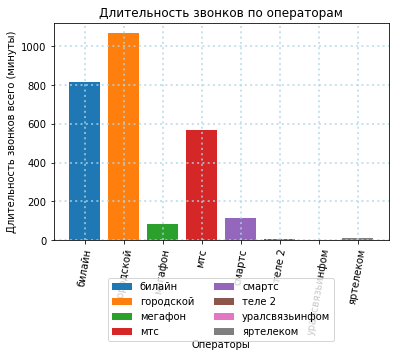

In [33]:
operators = data['operator'].unique()

# цикл по операторам
for operator in operators:
    # выбираем данные для текущего оператора
    operator_data = calls_by_month_operator.loc[operator]
    
    # считаем общую длительность звонков для текущего оператора
    total_duration = operator_data.sum()
    
    # создаем столбчатый график
    plt.bar(operator, total_duration, label=operator)
    
# добавляем легенду и метки осей
plt.legend()
plt.title('Длительность звонков по операторам')
plt.xlabel('Операторы')
plt.ylabel('Длительность звонков всего (минуты)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(color='LightBlue', alpha=0.7, linestyle=':', linewidth=2)
plt.xticks(rotation=80)# выводим график
plt.show()


In [34]:
def call_cost(row,i):
    return row['call_duration'] * row[f'cost_tarif_{i}']

In [35]:
for i in range(1,7):
    data[f'total_call_tarif_{i}'] = data.apply(call_cost, args=(i,), axis=1)


In [36]:
for i in range(1,7):
    data[f'total_cost_{i}'] = data[f'total_call_tarif_{i}'].sum()

In [37]:
total_cost_data = data.iloc[:,-6:].head(1).reset_index().drop('date',axis=1)

In [38]:
total_cost_data = total_cost_data.T

In [39]:
total_cost_data.columns = ['total_cost']


In [40]:
total_cost_data= total_cost_data.sort_values(by='total_cost')

In [41]:
total_cost_data

,total_cost
total_cost_5,28.25
total_cost_6,133.60
total_cost_4,1362.82
total_cost_1,2263.00
total_cost_3,4128.15
total_cost_2,7753.45


In [42]:
tarif_dct

{'tarif_1': 'Монстр общения',
 'tarif_2': 'Хочу сказать ',
 'tarif_3': 'Больше слов ',
 'tarif_4': '33 копейки ',
 'tarif_5': 'Много звонков'}

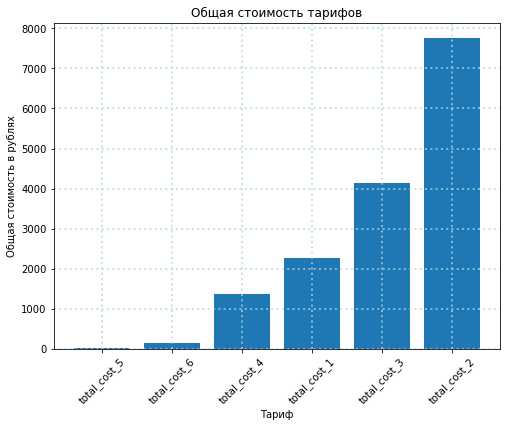

In [43]:
# создаем объект графика
fig, ax = plt.subplots(figsize=(8, 6))

# задаем данные для осей x и y
x = total_cost_data.index
y = total_cost_data['total_cost']

# строим столбчатый график
ax.bar(x, y)

# настраиваем внешний вид графика
ax.set_title('Общая стоимость тарифов')
ax.set_xlabel('Тариф')
ax.set_ylabel('Общая стоимость в рублях')
ax.tick_params(axis='x', rotation=45)
plt.grid(color='LightBlue', alpha=0.7, linestyle=':', linewidth=2)
# отображаем график
plt.show()


В тарифе "Много звонков" нет речи о том, что звонки на номера этого же оператора, МТС, стоят каких-то денег.

Таким образом, я сделал раздвоение для тарифа №5:

* total_cost_5 - Если звонки на МТС бесплатные
* total_cost_6 - Если звонки на МТС стоят столько же, как и на другие операторы

**Вывод:**

В итоге, в обоих случаях тариф от МТС самый выгодный для человека. 